In [1]:
# Name = Amithi Thakur
# sec = H
# University Roll no = 2018151 
# Class roll no = 12
# Student id = 20012142
# Enrollment no = PV-D2018151












# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Import Module


In [2]:
import pandas as pd
import numpy as np
import os   ## for creating and removing a directory (folder)
import seaborn as sns ##Matplotlib underneath to plot graphs.
import matplotlib.pyplot as plt
import librosa  ## for music and audio analysis
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

Load the Dataset

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())## inserts a single element into an existing list
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
len(paths)

2800

In [5]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [6]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [7]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [8]:
df['label'].value_counts()

fear       400
angry      400
disgust    400
neutral    400
sad        400
ps         400
happy      400
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

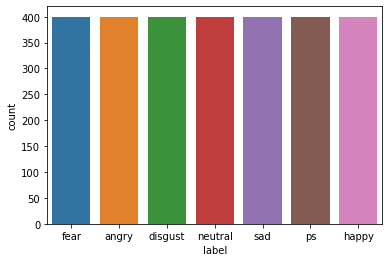

In [9]:
sns.countplot(df['label'])

In [10]:
def waveshow(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

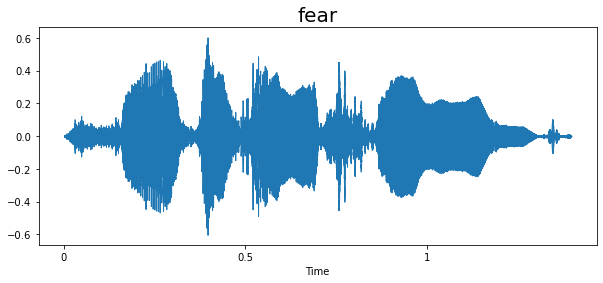

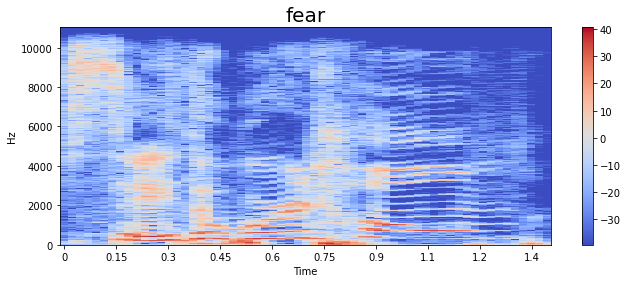

In [11]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path) ## the average number of samples obtained in one second,
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

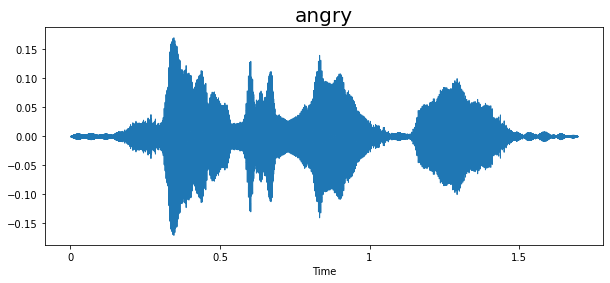

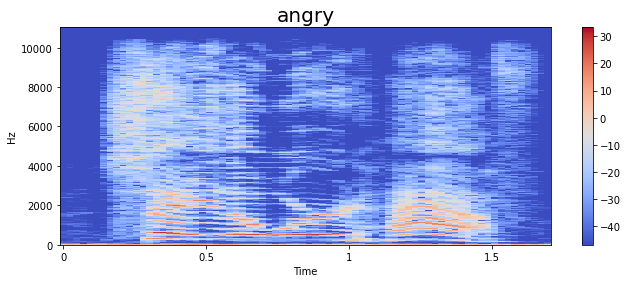

In [12]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

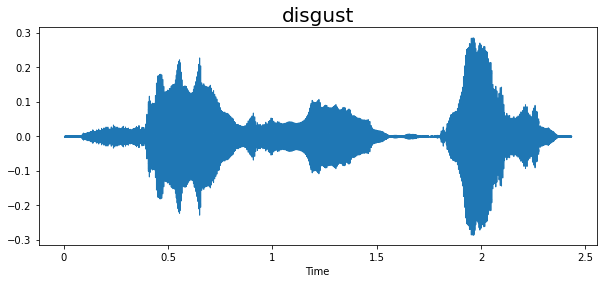

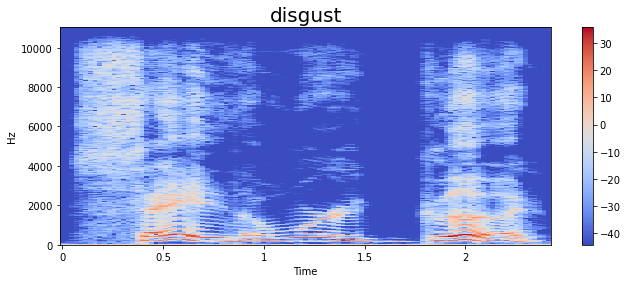

In [13]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

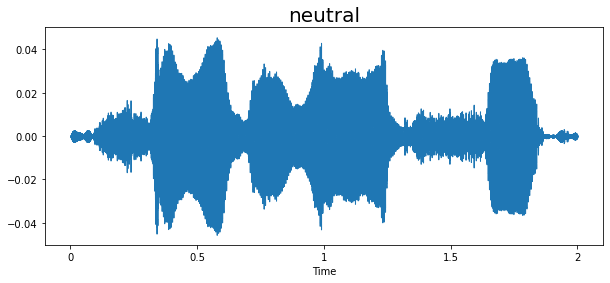

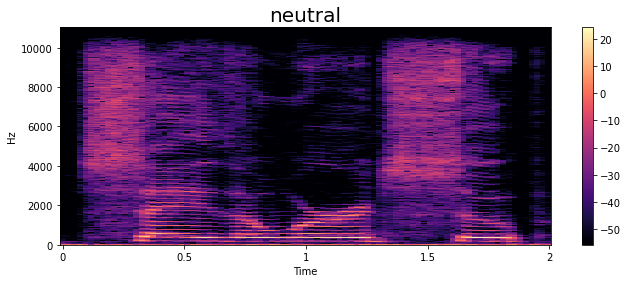

In [14]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

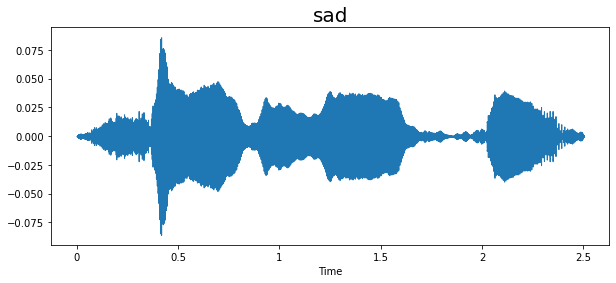

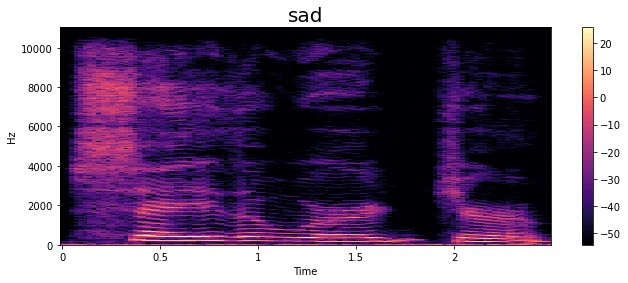

In [15]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

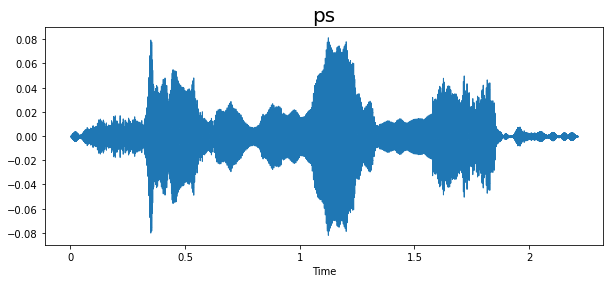

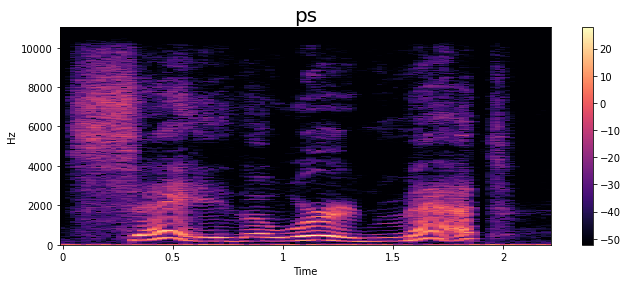

In [16]:
# Pleasent surprise(ps) 
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

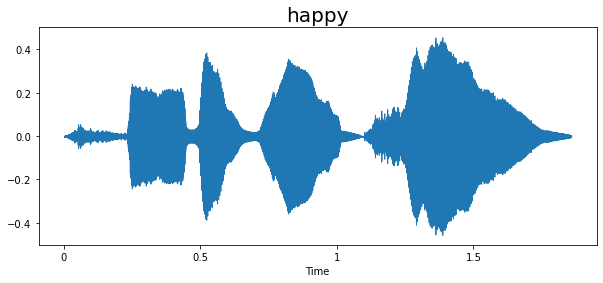

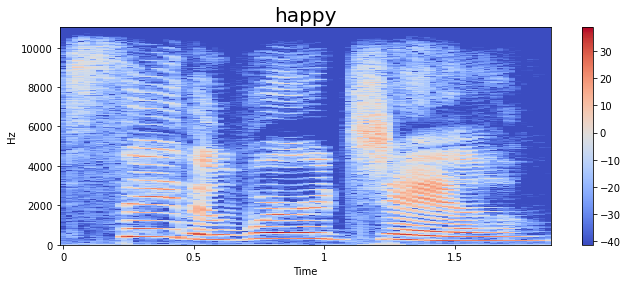

In [17]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

Feature Extraction

In [18]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [19]:
extract_mfcc(df['speech'][0])

array([-287.13037  ,   87.756935 ,   -4.139178 ,   24.081968 ,
        -16.696726 ,   12.9706335,   10.522443 ,   -1.1463207,
         -0.7333776,   12.855535 ,  -19.147291 ,   -6.418062 ,
          4.9657674,   -2.6571147,  -10.655446 ,    4.9578824,
        -14.555861 ,   15.37587  ,   18.444933 ,   23.878317 ,
         31.495148 ,   17.326372 ,   -4.764838 ,    1.7432449,
        -12.009848 ,    7.34574  ,   -3.205127 ,   -7.1714525,
        -11.410635 ,   -2.0019934,   -5.6109643,    4.532194 ,
        -11.396626 ,   -8.892363 ,   -3.7391381,    4.8819685,
         -1.5599906,    2.4654472,   11.599151 ,   11.042193 ],
      dtype=float32)

In [20]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [21]:
X_mfcc

0       [-287.13037, 87.756935, -4.139178, 24.081968, ...
1       [-350.0836, 37.654167, -6.292855, 17.096148, 4...
2       [-341.78152, 56.15365, -16.617884, 23.219698, ...
3       [-309.17456, 24.854897, -8.001089, 10.065497, ...
4       [-347.12918, 49.69155, -27.524876, 22.730288, ...
                              ...                        
2795    [-376.5839, 63.959797, -3.0598662, 11.498796, ...
2796    [-316.5801, 43.546066, -9.336959, -0.19844404,...
2797    [-359.7638, 81.01536, -18.355762, 5.30123, -25...
2798    [-354.38315, 103.432144, -15.916283, -10.30884...
2799    [-391.15958, 56.44471, -1.0464002, 0.95874214,...
Name: speech, Length: 2800, dtype: object

In [22]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [23]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [24]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [25]:
y= y.toarray()

In [26]:
y.shape

(2800, 7)

Create the LSTM Model

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2023-01-26 13:19:08.861452: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 123)               61500     
_________________________________________________________________
dropout (Dropout)            (None, 123)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                7936      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 2

In [28]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

2023-01-26 13:19:09.751682: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
5/5 [==============================] - 4s 371ms/step - loss: 1.9022 - accuracy: 0.2732 - val_loss: 1.9665 - val_accuracy: 0.0411
Epoch 2/100
5/5 [==============================] - 1s 231ms/step - loss: 1.7116 - accuracy: 0.4411 - val_loss: 2.0515 - val_accuracy: 0.0018
Epoch 3/100
5/5 [==============================] - 1s 226ms/step - loss: 1.4709 - accuracy: 0.5143 - val_loss: 2.2979 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 1s 236ms/step - loss: 1.1855 - accuracy: 0.5710 - val_loss: 2.4967 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 1s 218ms/step - loss: 0.9277 - accuracy: 0.6567 - val_loss: 2.6406 - val_accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 1s 209ms/step - loss: 0.7971 - accuracy: 0.6964 - val_loss: 2.6100 - val_accuracy: 0.0036
Epoch 7/100
5/5 [==============================] - 1s 210ms/step - loss: 0.6684 - accuracy: 0.7464 - val_loss: 2.5325 - val_accuracy: 0.0286
E

Plot the result

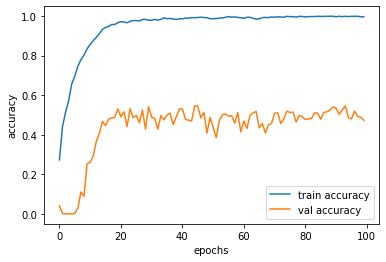

In [29]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

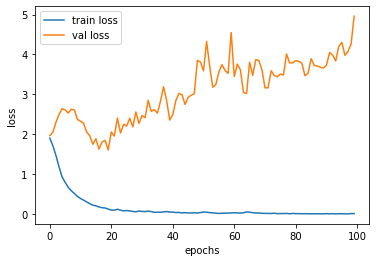

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()